### VP of Product: Which product line should we expand?

- Is there a product category that is particularly profitable for us?
- Does one or another stand out in terms of sales volume? 
- Does this vary by customer segment?

In [41]:
from env import get_db_url
import pandas as pd
import prepare

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [43]:
# df = acquire_stephen.get_superstore_data()

In [44]:
df = prepare.prepare_superstore_data()

Reading csv file..


In [45]:
df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'sales', 'quantity', 'discount', 'profit',
       'category', 'sub-category', 'customer_name', 'product_name',
       'region_name'],
      dtype='object')

In [46]:
df.city.value_counts()

New York City    192
Los Angeles      124
Philadelphia     123
San Francisco     96
Seattle           62
                ... 
Carlsbad           1
Redlands           1
Whittier           1
Santa Clara        1
Brownsville        1
Name: city, Length: 247, dtype: int64

In [6]:
df.order_date.sort_values()

977    2014-01-04
978    2014-01-04
979    2014-01-04
942    2014-01-09
941    2014-01-09
          ...    
952    2017-12-30
1453   2017-12-30
1452   2017-12-30
1451   2017-12-30
637    2017-12-30
Name: order_date, Length: 1734, dtype: datetime64[ns]

In [8]:
df.columns

Index(['region_id', 'product_id', 'customer_id', 'category_id', 'order_id',
       'order_date', 'ship_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'sales', 'quantity', 'discount', 'profit',
       'category', 'sub-category', 'customer_name', 'product_name',
       'region_name'],
      dtype='object')

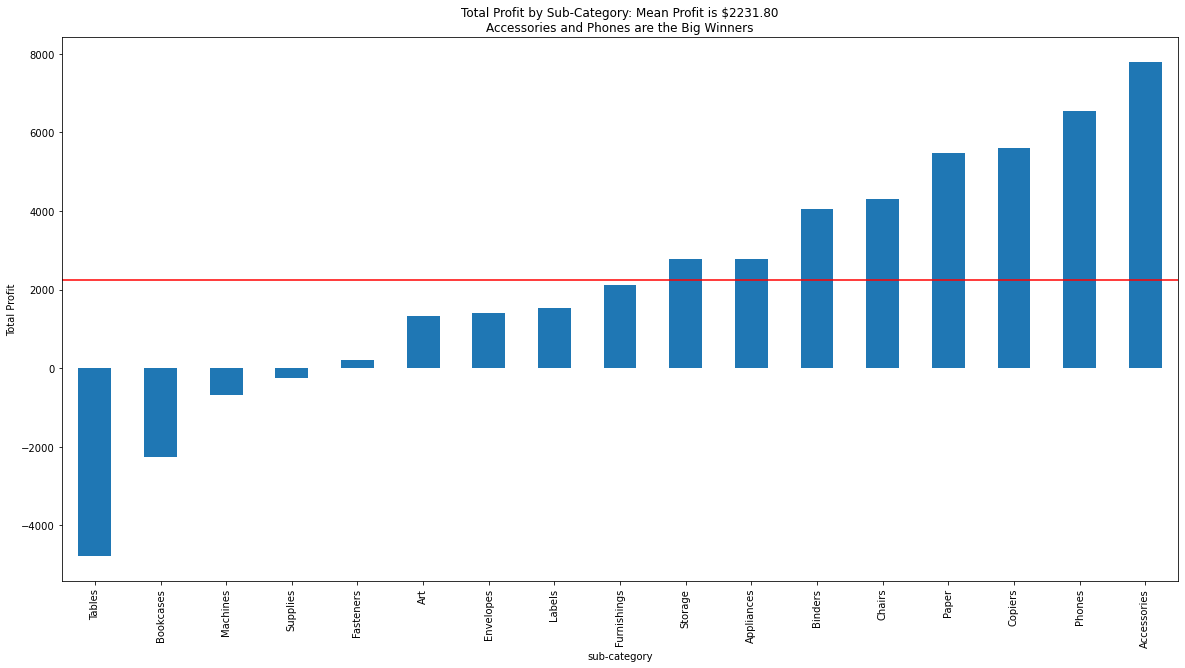

In [34]:
mean_profit = df.groupby("sub-category").profit.sum().mean()
df.groupby("sub-category").profit.sum().sort_values().plot.bar()
plt.title(f'Total Profit by Sub-Category: Mean Profit is ${mean_profit:.2f}\nAccessories and Phones are the Big Winners')
plt.ylabel('Total Profit')
plt.axhline(mean_profit, color='r')

In [40]:
df.groupby("sub-category").profit.sum()

sub-category
Accessories    7786.3621
Appliances     2776.4985
Art            1336.4246
Binders        4062.6403
Bookcases     -2267.7776
Chairs         4306.3499
Copiers        5598.3914
Envelopes      1394.5297
Fasteners       215.6470
Furnishings    2124.3447
Labels         1544.5261
Machines       -680.6722
Paper          5464.4993
Phones         6547.2634
Storage        2771.6621
Supplies       -253.9979
Tables        -4786.1621
Name: profit, dtype: float64

In [38]:
for cat in df["sub-category"].unique():
    overall_mean = df.groupby("sub-category").profit.sum().mean()
    sample = df[df["sub-category"] == cat].profit
    t,p = stats.ttest_1samp(sample, overall_mean)
    print(cat, t, p/2>0.05)

Bookcases -41.664325143472574 9.05587056018977e-31
Chairs -165.90393822159547 8.238236822286858e-118
Tables -79.12483675337324 3.440145816157086e-63
Storage -452.35126325700213 7.73397154481315e-252
Paper -968.6109127252502 0.0
Furnishings -532.3622095330813 1.2272010785689843e-271
Appliances -132.5746144623158 8.403620897505721e-86
Binders -135.24411526875082 2.1416368529630025e-244
Envelopes -424.38403106259454 7.089206546405366e-86
Accessories -183.53659218511666 7.220979768222338e-159
Phones -300.3159222907991 2.0323782024631686e-217
Art -1613.6188674300513 4.5612668e-316
Supplies -239.8562460664438 1.755151998481102e-46
Labels -325.6089847625344 1.5442730106294283e-107
Fasteners -2828.293907982558 1.6288769448203138e-112
Machines -8.301642683468897 6.549362338491639e-08
Copiers -10.776789621730444 1.913336524515995e-06
